In [ ]:
!pip install Mecab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 522 kB/s 
     |████████████████████████████████| 62 kB 326 kB/s 
     |████████████████████████████████| 63 kB 847 kB/s 
ERROR: Could not find a version that satisfies the requirement Mecab (from versions: 0.996, 0.996.2, 0.996.3)
ERROR: No matching distribution found for Mecab


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 48.4 MB/s 


In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.models import load_model
from keras.layers import Dense, Activation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random


model = load_model('/content/drive/MyDrive/sentiment_analysis.h5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 70)          263060    
                                                                 
 lstm_2 (LSTM)               (None, 64)                34560     
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 298,010
Trainable params: 298,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
music_data = pd.read_csv('/content/drive/MyDrive/music_more_list.csv')
music_data.head()

,Unnamed: 0,title,artist,Album_date,LIKE,Album_name,Album_Genre,Lyric,label
0,0,That That (prod. & feat. SUGA of BTS),싸이 (PSY),2022.04.29,"61,873",싸다9,댄스,20 22PSY Coming back (이리 오너라)Long time no see ...,1
1,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),2022.04.05,"260,548",봄여름가을겨울 (Still Life),록/메탈,이듬해 질 녘 꽃 피는 봄 한여름 밤의 꿈가을 타 겨울 내릴 눈 1년 네 번 또다시...,3
2,2,LOVE DIVE,IVE (아이브),2022.04.05,"113,987",LOVE DIVE,댄스,네가 참 궁금해 그건 너도 마찬가지이거면 충분해 쫓고 쫓는 이런 놀이참을 수 없는 ...,3
3,3,TOMBOY,(여자)아이들,2022.03.14,"160,448",I NEVER DIE,록/메탈,Look at you 넌 못 감당해 날Ya took off hook기분은 Coke ...,6
4,4,사랑인가 봐,멜로망스,2022.02.18,"104,535",사랑인가 봐 (사내맞선 OST 스페셜 트랙),"발라드, 국내드라마",너와 함께 하고 싶은 일들을상상하는 게요즘 내 일상이 되고너의 즐거워하는 모습을 보...,4


In [ ]:
music_data.rename(columns = {'Lyric' : 'text'}, inplace = True)

In [ ]:
x_data = music_data['text'].apply(lambda x : x.replace('\n', ' '))
x_data = x_data.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
x_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0        이리 오너라    오래간만이지 우리 다시 웃고 울고 지지고 볶고    그래 ...
1    이듬해 질 녘 꽃 피는 봄 한여름 밤의 꿈가을 타 겨울 내릴 눈 년 네 번 또다시 ...
2    네가 참 궁금해 그건 너도 마찬가지이거면 충분해 쫓고 쫓는 이런 놀이참을 수 없는 ...
3       넌 못 감당해 날   기분은       나의  이름       네가 싫다 해도...
4    너와 함께 하고 싶은 일들을상상하는 게요즘 내 일상이 되고너의 즐거워하는 모습을 보...
Name: text, dtype: object

In [ ]:
print(sum(map(len, x_data)) / len(x_data))

408.1308102616205


In [ ]:
x_data = music_data['text']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_data)


In [ ]:
len(tokenizer.word_index)

140872

In [ ]:
threshold = 10
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 140872
등장 빈도가 9번 이하인 희귀 단어의 수: 135964
단어 집합에서 희귀 단어의 비율: 96.51598614344937
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 37.27914431397299


In [ ]:
print(tokenizer.word_index['너무'])

65


In [ ]:
total_cnt - rare_cnt + 1

4909

In [ ]:
total_cnt = len(tokenizer.word_index)
tokenizer = Tokenizer(3758)
tokenizer.fit_on_texts(x_data)

x_data = tokenizer.texts_to_sequences(x_data)

In [ ]:
print(x_data[:3])

[[686, 108, 470, 335, 100, 41, 72, 2071, 2071, 97, 71, 400, 361, 46, 230, 1116, 536, 36, 2728, 753, 1566, 673, 11, 3, 79, 1, 69, 8, 43, 1, 69, 8, 31, 31, 477, 114, 31, 477, 1, 69, 8, 43, 1, 69, 8, 31, 31, 477, 114, 70, 31, 19, 19, 2, 24, 19, 24, 19, 778, 536, 1117, 1117, 2480, 1521, 1456, 849, 8, 78, 386, 813, 4, 3, 2255, 849, 8, 19, 19, 2, 24, 19, 2, 24, 19, 19, 2, 24, 24, 19, 19, 19, 2, 24, 19, 2, 24, 19, 19, 2, 24, 24, 39, 426, 164, 19, 19, 2, 24, 19, 24, 19, 338, 2072, 19, 2, 24, 19, 24, 19, 2, 18, 540, 2, 18, 540, 19, 2, 24, 19, 2, 24, 19, 24, 19, 39, 1118, 36, 466, 912, 1165, 31, 31, 36, 307, 31, 31, 1, 69, 8, 43, 1, 69, 8, 31, 31, 477, 114, 31, 477, 1, 69, 8, 43, 1, 69, 8, 31, 31, 477, 114, 70, 31, 19, 19, 2, 24, 19, 24, 19, 778, 536, 1117, 1117, 2480, 1521, 1456, 849, 8, 78, 386, 813, 4, 3, 2255, 849, 8, 19, 19, 2, 24, 19, 2, 24, 19, 19, 2, 24, 24, 19, 19, 19, 2, 24, 19, 2, 24, 19, 19, 2, 24, 24, 19, 19, 45, 1, 45, 1, 45, 1, 33, 79, 45, 19, 19, 2, 24, 19, 45, 1, 45, 1, 45, 1, 3

리뷰의 최대 길이 : 506
리뷰의 평균 길이 : 92.72796545593091


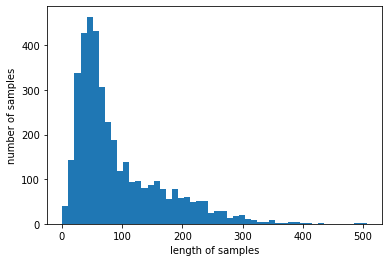

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in x_data))
print('리뷰의 평균 길이 :',sum(map(len, x_data))/len(x_data))
plt.hist([len(review) for review in x_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f5629224e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5629244e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5629246ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5629246990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5629910b10>,
  <matplotlib.lines.Line2D at 0x7f5629244950>]}

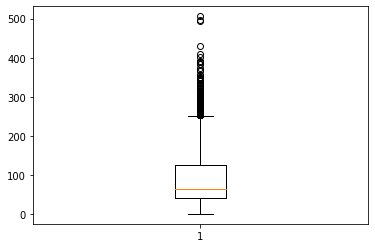

In [ ]:
length_of_review = np.array([len(data) for data in x_data])
plt.boxplot(length_of_review)

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 70
below_threshold_len(max_len, x_data)

전체 샘플 중 길이가 70 이하인 샘플의 비율: 54.051308102616204


In [ ]:
x_data = pad_sequences(x_data, maxlen = max_len)

In [ ]:
x_data

array([[1456,  849,    8, ...,    2,   24,   19],
       [ 186,  186,    9, ..., 1167, 1917, 1367],
       [1276,   32, 1705, ..., 1248,   15, 2608],
       ...,
       [   0,    0,    0, ...,   42, 1068, 1274],
       [ 300,   20, 1432, ...,    2,  305,  123],
       [ 323,   41,  571, ...,   12, 3363,  136]], dtype=int32)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 70)          263060    
                                                                 
 lstm_2 (LSTM)               (None, 64)                34560     
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 298,010
Trainable params: 298,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from numpy import argmax
output = np.argmax(model.predict(x_data), axis = 1)
output

array([3, 0, 2, ..., 2, 4, 2])

In [161]:
music_data.drop(['label'], axis = 1)

,Unnamed: 0,title,artist,Album_date,LIKE,Album_name,Album_Genre,text,second_label
0,0,That That (prod. & feat. SUGA of BTS),싸이 (PSY),2022.04.29,"61,873",싸다9,댄스,20 22PSY Coming back (이리 오너라)Long time no see ...,3
1,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),2022.04.05,"260,548",봄여름가을겨울 (Still Life),록/메탈,이듬해 질 녘 꽃 피는 봄 한여름 밤의 꿈가을 타 겨울 내릴 눈 1년 네 번 또다시...,0
2,2,LOVE DIVE,IVE (아이브),2022.04.05,"113,987",LOVE DIVE,댄스,네가 참 궁금해 그건 너도 마찬가지이거면 충분해 쫓고 쫓는 이런 놀이참을 수 없는 ...,2
3,3,TOMBOY,(여자)아이들,2022.03.14,"160,448",I NEVER DIE,록/메탈,Look at you 넌 못 감당해 날Ya took off hook기분은 Coke ...,2
4,4,사랑인가 봐,멜로망스,2022.02.18,"104,535",사랑인가 봐 (사내맞선 OST 스페셜 트랙),"발라드, 국내드라마",너와 함께 하고 싶은 일들을상상하는 게요즘 내 일상이 되고너의 즐거워하는 모습을 보...,5
...,...,...,...,...,...,...,...,...,...
3932,4654,기억의 습작,전람회,1994.05,"50,019",Exhibition,발라드,이젠 버틸 수 없다고휑한 웃음으로 내 어깨 기대어눈을 감았지만이젠 말할 수 있는 걸...,5
3933,4655,Bye Bye,Mariah Carey,2008.08.01,"7,023",Bye Bye,POP,this is for my peoplewho just lost somebodyyou...,2
3934,4656,날아라 병아리,넥스트,1994.05.01,"7,614",The Return Of N.EX.T Part 1 The Being,발라드,육교 위의 네모난상자 속에서처음 나와 만난노란 병아리 얄리는처음처럼 다시 조그만상자...,2
3935,4657,Don't Know Why,Norah Jones,2002.01.01,"54,859",Come Away With Me,"재즈, 보컬재즈, 애시드/퓨전/팝",I waited 'til I saw the sunI don't know why I ...,4


In [155]:
music_data[(music_data['label'] - 1 == music_data['second_label'])]

,Unnamed: 0,title,artist,Album_date,LIKE,Album_name,Album_Genre,text,label,second_label
2,2,LOVE DIVE,IVE (아이브),2022.04.05,"113,987",LOVE DIVE,댄스,네가 참 궁금해 그건 너도 마찬가지이거면 충분해 쫓고 쫓는 이런 놀이참을 수 없는 ...,3,2
7,7,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),2022.04.20,"75,710",정이라고 하자,R&B/Soul,Back to the day갓 10대가 됐을 때그때 내가 널 보지 못했다면어땠을까 ...,1,0
10,10,사랑은 늘 도망가,임영웅,2021.10.11,"157,789",신사와 아가씨 OST Part.2,"발라드, 국내드라마",눈물이 난다 이 길을 걸으면그 사람 손길이 자꾸 생각이 난다붙잡지 못하고 가슴만 떨...,3,2
15,15,신호등,이무진,2021.05.14,"274,095",신호등,록/메탈,이제야 목적지를 정했지만가려한 날 막아서네 난 갈 길이 먼데새빨간 얼굴로 화를 냈던...,1,0
16,16,ELEVEN,IVE (아이브),2021.12.01,"128,708",ELEVEN,댄스,따분한 나의 눈빛이무표정했던 얼굴이널 보며 빛나고 있어널 담은 눈동자는 odd내 안...,1,0
...,...,...,...,...,...,...,...,...,...,...
3908,4623,소중한 사람,심규선 (Lucia),2012.10.17,"6,478",Decalcomanie,"발라드, 인디음악, 포크/블루스",평범한 순간들바람이 나무를 춤추게 하듯멈춰 있던 내 시간을그대가 흔들어 깨어나게 해...,1,0
3911,4626,Norway,슬로우 쥰,2013.01.09,274,Lucia(심규선) & Sabo(유상봉) Curated Ten Years After...,포크/블루스,조금 더운 바람이 불어오는이름 모를 거리엔반가운 사람들의 그 목소리하나 둘씩 찾아와...,6,5
3920,4636,This Is Not A Love Song,Nouvelle Vague,2006.12.22,"12,323",소울메이트 OST,국내드라마,This is not a love songHappy to have Not to ha...,2,1
3922,4638,알고있어요,루시드폴,2009.12.10,736,레 미제라블,"인디음악, 포크/블루스",행복하게 웃어보자오늘 너무 슬퍼 보여내 말에 그저 조용히 웃던그대의 뒷 모습하지만 ...,5,4


In [ ]:
music_data['second_label'] = output

In [162]:
music_data.head()

,Unnamed: 0,title,artist,Album_date,LIKE,Album_name,Album_Genre,text,label,second_label
0,0,That That (prod. & feat. SUGA of BTS),싸이 (PSY),2022.04.29,"61,873",싸다9,댄스,20 22PSY Coming back (이리 오너라)Long time no see ...,1,3
1,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),2022.04.05,"260,548",봄여름가을겨울 (Still Life),록/메탈,이듬해 질 녘 꽃 피는 봄 한여름 밤의 꿈가을 타 겨울 내릴 눈 1년 네 번 또다시...,3,0
2,2,LOVE DIVE,IVE (아이브),2022.04.05,"113,987",LOVE DIVE,댄스,네가 참 궁금해 그건 너도 마찬가지이거면 충분해 쫓고 쫓는 이런 놀이참을 수 없는 ...,3,2
3,3,TOMBOY,(여자)아이들,2022.03.14,"160,448",I NEVER DIE,록/메탈,Look at you 넌 못 감당해 날Ya took off hook기분은 Coke ...,6,2
4,4,사랑인가 봐,멜로망스,2022.02.18,"104,535",사랑인가 봐 (사내맞선 OST 스페셜 트랙),"발라드, 국내드라마",너와 함께 하고 싶은 일들을상상하는 게요즘 내 일상이 되고너의 즐거워하는 모습을 보...,4,5


In [163]:
music_data['label'].value_counts()

4    806
1    752
3    667
2    602
6    578
5    532
Name: label, dtype: int64

In [ ]:
music_data.to_csv('/content/drive/MyDrive/Music_melon.csv')

In [180]:
sentiment_data = pd.read_excel('/content/drive/MyDrive/sentiment_analysis.xlsx')
sentiment_data.head()

,번호,value,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3
0,24070,1,청년,여성,"진로, 취업, 직장",해당없음,기쁨,신이 난,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.
1,27879,1,청년,여성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,NaN,NaN
2,51471,1,중년,여성,"직장, 업무 스트레스",해당없음,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,NaN,NaN
3,7140,1,노년,남성,대인관계,만성질환 유,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.
4,39663,1,노년,남성,재정,만성질환 유,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,NaN,NaN


In [181]:
sentiment_data.fillna(' ', inplace = True)

In [182]:
sentiment_data['text'] = sentiment_data['사람문장1'] + ' ' + sentiment_data['시스템응답1'] + ' ' + sentiment_data['사람문장2'].map(str) + ' ' + sentiment_data['시스템응답2'].map(str) + ' ' + sentiment_data['사람문장3'] + ' ' + sentiment_data['시스템응답3']
sentiment_data.head()

,번호,value,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,text
0,24070,1,청년,여성,"진로, 취업, 직장",해당없음,기쁨,신이 난,지금 난 기분이 너무 좋아.,굉장히 즐거우신 것 같은데요? 좋은 일이 있나요?,오늘부터 연휴가 시작됐거든. 내일 회사 안 간다.,그거 정말 기분 좋을 만하네요. 무엇을 할 예정인가요?,그냥 집에서 뒹굴뒹굴하고 넷플릭스 보고 놀 거야.,집에서 노는 것이 최고죠. 생각만 해도 행복하겠어요.,지금 난 기분이 너무 좋아. 굉장히 즐거우신 것 같은데요? 좋은 일이 있나요? 오늘...
1,27879,1,청년,여성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,나도 조카가 생겨! 너무 기뻐.,정말 좋은 소식이네요. 축하할 특별한 계획이 있을까요?,응. 언니에게 꽃다발을 선물할 거야. 예쁜 딸이면 좋을 것 같아서.,언니에게 꽃을 선물하려고 하시는군요.,,,나도 조카가 생겨! 너무 기뻐. 정말 좋은 소식이네요. 축하할 특별한 계획이 있을까...
2,51471,1,중년,여성,"직장, 업무 스트레스",해당없음,불안,불안,거래처와의 다음 계약이 무산될까봐 불안해.,많이 걱정되시겠어요. 계약이 무산될 것 같다고 생각하는 이유가 있으신가요?,딱히 이유는 없어. 그냥 나 혼자 불안한 상태야.,계약을 성공적으로 마무리하실 수 있기를 기원해요.,,,거래처와의 다음 계약이 무산될까봐 불안해. 많이 걱정되시겠어요. 계약이 무산될 것 ...
3,7140,1,노년,남성,대인관계,만성질환 유,슬픔,염세적인,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...,몸이 아픈데 아내가 이혼하자고 하니 혼자 있는 것 같은 기분을 느끼셨군요.,젊은 시절에 가정에 소홀했지. 그래도 그렇지 이혼을 하자니 너무 허망해.,지금의 기분에서 벗어나기 위해 무엇을 하면 좋을까요?,아내에게 졸혼은 어떤지 대화를 나누어 봐야겠어. 졸혼을 한다면 가끔씩이라도 도움을 ...,아내와의 대화로 기분이 나아졌으면 좋겠어요.,당뇨로 고생 중인데 아내가 이혼하자더군. 아내가 날 버리면 병은 더 악화될 텐데 세...
4,39663,1,노년,남성,재정,만성질환 유,슬픔,마비된,노년에 재정적으로 이루어 놓은게 없어서 걱정이야.,나이들어 재정적으로 어려워서 걱정되시는군요.,정말이지 막막해.,막막한 현실이지만 분명 해결책을 찾을 수 있을거예요.,,,노년에 재정적으로 이루어 놓은게 없어서 걱정이야. 나이들어 재정적으로 어려워서 걱정...


In [183]:
sentimential_list =  {'기쁨': 0, '분노' : 2, '불안' : 3, '당황' : 1, '슬픔' : 5, '상처' : 4}
sentiment_data['label'] = sentiment_data['감정_대분류'].map(sentimential_list)



In [184]:
crowl_text, label = sentiment_data.loc[random.randint(0, len(sentiment_data)), 'text'], sentiment_data.loc[random.randint(0, len(sentiment_data)), 'label']
crowl_text, label

('그래. 시험은 내년에도 있으니까 지금이라도 다시 열심히 공부하는게 좋겠어. 잘 생각하셨어요. 응원할게요. 학교에 친구가 없어서 외로워. 친구가 없어서 외로우시군요 부디 힘내시길 바래요. 고마워 그래도 학교에 친구가 없다는건 고역이란 말이지. 어떻게 하면 친구를 사귀시길 수 있을지 함께 고민해보죠.',
 3)

In [185]:
music_lyrics = music_data[music_data['second_label'] == label][['title', 'artist', 'text']]
music_lyrics.loc['crowl_data'] = ['crowling_data', 'user', crowl_text]
music_lyrics.head()

,title,artist,text
0,That That (prod. & feat. SUGA of BTS),싸이 (PSY),20 22PSY Coming back (이리 오너라)Long time no see ...
8,LOVE me,BE'O (비오),"Hey girl, Where you at? (Where you at?)대체 어디서 ..."
12,ZOOM,제시 (Jessi),Lights Camera ActionI see you lookin at my P I...
13,INVU,태연 (TAEYEON),Falling in love너에겐 난 Option시작부터 다른 너와 나깨지는 Hea...
21,SMILEY (Feat. BIBI),YENA (최예나),울지 마 울지 마어린아이같이웃는 게 웃는 게이기는 거라고You are so cute...


In [186]:
music_lyrics[music_lyrics['artist'] == 'user']

,title,artist,text
crowl_data,crowling_data,user,그래. 시험은 내년에도 있으니까 지금이라도 다시 열심히 공부하는게 좋겠어. 잘 생각...


In [189]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from konlpy.tag import Okt

okt = Okt()
tfidf = TfidfVectorizer(ngram_range = (1, 2), min_df = 3,  max_df = 0.9, tokenizer = okt.morphs, token_pattern = None)

In [190]:
tfidf.fit(music_lyrics['text'])

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2), token_pattern=None,
                tokenizer=<bound method Okt.morphs of <konlpy.tag._okt.Okt object at 0x7f55f917fa10>>)

In [191]:
music_lyrics.head()

,title,artist,text
0,That That (prod. & feat. SUGA of BTS),싸이 (PSY),20 22PSY Coming back (이리 오너라)Long time no see ...
8,LOVE me,BE'O (비오),"Hey girl, Where you at? (Where you at?)대체 어디서 ..."
12,ZOOM,제시 (Jessi),Lights Camera ActionI see you lookin at my P I...
13,INVU,태연 (TAEYEON),Falling in love너에겐 난 Option시작부터 다른 너와 나깨지는 Hea...
21,SMILEY (Feat. BIBI),YENA (최예나),울지 마 울지 마어린아이같이웃는 게 웃는 게이기는 거라고You are so cute...


In [193]:
tfidf_matrix = tfidf.fit_transform(music_lyrics['text'])
cosine_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix)
recommendation_need = cosine_sim[-1]
recommendation_need

array([0.00471727, 0.00775229, 0.0082818 , 0.00787666, 0.02836739,
       0.        , 0.03727936, 0.01093951, 0.        , 0.0203333 ,
       0.02742881, 0.00951219, 0.01456718, 0.12746264, 0.01255762,
       0.01783506, 0.01319457, 0.01251745, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02882409, 0.03908575, 0.01611774,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03100536, 0.02887176, 0.03539941, 0.01868303,
       0.0288946 , 0.00390741, 0.01165386, 0.01582571, 0.01178845,
       0.0117493 , 0.03010028, 0.        , 0.        , 0.     

In [194]:
#첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = np.argsort(recommendation_need)[::-1]
recommend_index= sorted_index[2:11]
music_lyrics.iloc[recommend_index][['title', 'artist']]

,title,artist
1875,The Last Time,Eric Benet
1090,No.5 (Feat. Crush),페노메코 (PENOMECO)
1458,To Hell With The Devil,Stryper
58,Blueming,아이유
3420,넌 행복해,소란 (SORAN)
2719,나를 슬프게 하는 사람들,김경호
1891,답답한 새벽,스웨덴세탁소
1856,Producer Man,Lyn Lapid
3191,헤어지던 밤,어쿠루브
